In [1]:
is_colab = True
if is_colab:
    data_dir = 'https://raw.githubusercontent.com/utm529f/sukkiri-ml-codes-polars/main/datafiles'
else:
    data_dir = '../datafiles'

In [2]:
import polars as pl
# 欠損値があるままでは学習できないので欠損値処理だけ行う
df = pl.read_csv(f'{data_dir}/cinema.csv')
df = df.fill_null(strategy='mean')
x = df[:, 'SNS1':'original']
t = df['sales']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, t)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [3]:
from sklearn.metrics import mean_squared_error
# 訓練データでのMSE値
pred = model.predict(x)

mse = mean_squared_error(pred, t)
mse

151983.3470145188

In [4]:
import math
math.sqrt(mse) # RMSEの計算

389.8504162041113

In [5]:
from sklearn.metrics import mean_absolute_error 
yosoku = [2, 3, 5, 7, 11, 13] # 予測結果をリストで作成
target = [3, 5, 8, 11, 16, 19] # 実際の結果をリストで作成

mse = mean_squared_error(yosoku, target)
print('rmse:{}'.format(math.sqrt(mse)))
print('mae:{}'.format(mean_absolute_error(yosoku, target)))

print('外れ値の混入')
yosoku = [2, 3, 5, 7, 11, 13, 46] # 実際には23だけど46と予測
target = [3, 5, 8, 11, 16, 19, 23]
mse = mean_squared_error(yosoku, target)
print('rmse:{}'.format(math.sqrt(mse)))
print('mae:{}'.format(mean_absolute_error(yosoku, target)))

rmse:3.8944404818493075
mae:3.5
外れ値の混入
rmse:9.411239481143202
mae:6.285714285714286


In [6]:
# データの準備
df = pl.read_csv(f'{data_dir}/Survived.csv')
df = df[['Pclass', 'Age', 'Survived']].fill_null(strategy='mean')

x = df[['Pclass', 'Age']]
t = df['Survived']

In [7]:
# モデルの準備
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 2,
random_state = 0)
model.fit(x, t)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
from sklearn.metrics import classification_report
pred = model.predict(x)
out_put = classification_report(y_pred = pred, y_true = t)
print(out_put)

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       549
           1       0.56      0.70      0.62       342

    accuracy                           0.67       891
   macro avg       0.67      0.68      0.67       891
weighted avg       0.69      0.67      0.68       891



In [9]:
out_put = classification_report(y_pred=pred, y_true=t, output_dict=True)

# out_putをデータフレームに変換
def report2df(report):
    rows = []
    for key, value in report.items():
        if isinstance(value, dict):
            rows.append({"class": key, **value})
        else:
            rows.append({"class": key, "precision": None, "recall": None, "f1-score": value, "support": None})

    return pl.DataFrame(rows)

report2df(out_put)

class,precision,recall,f1-score,support
str,f64,f64,f64,f64
"""0""",0.778742,0.653916,0.710891,549.0
"""1""",0.55814,0.701754,0.621762,342.0
"""accuracy""",null,null,0.672278,null
"""macro avg""",0.668441,0.677835,0.666326,891.0
"""weighted avg""",0.694066,0.672278,0.67668,891.0


In [10]:
df = pl.read_csv(f'{data_dir}/cinema.csv')
# 学習できないので欠損値処理だけ行う
df = df.fill_null(strategy='mean')
x = df[:, 'SNS1':'original']
t = df['sales']

In [11]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.model_selection import cross_validate

result = cross_validate(model, x, t, cv=kf, scoring='r2', return_train_score=True)
print(result)

{'fit_time': array([0.00452828, 0.00187278, 0.00202155]), 'score_time': array([0.00102067, 0.00101089, 0.        ]), 'test_score': array([0.7246535 , 0.71742905, 0.75975618]), 'train_score': array([0.76929032, 0.76368104, 0.7578068 ])}


In [13]:
sum(result['test_score']) / len(result['test_score'])

np.float64(0.7339462426293387)

In [14]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5,
    shuffle=True, random_state=0)

In [15]:
iris = pl.read_csv(f'{data_dir}/iris.csv')
iris = iris.fill_null(strategy='mean')
x = iris[:,:"花弁幅"]
t = iris["種類"]
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
result = cross_validate(model, x, t, cv = skf, scoring = 'accuracy',
return_train_score = True)


In [16]:
result

{'fit_time': array([0.00227451, 0.00243139, 0.0024271 , 0.00247455, 0.00234175]),
 'score_time': array([0.00129223, 0.00242686, 0.00203347, 0.00138783, 0.00260305]),
 'test_score': array([0.93333333, 0.9       , 0.86666667, 0.9       , 0.93333333]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [17]:
# 練習問題
import polars as pl
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split

# 追加
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import numpy as np #本書ではあまり紹介していないnumpyライブラリ
import matplotlib.pyplot as plt

%matplotlib inline

df = pl.read_csv(f'{data_dir}/Bank.csv')
# まず、ダミー変数化をしたいが、文字列の列が複数あるので抜き出す。
str_col_name = ['job','default','marital','education','housing','loan','contact','month']
str_df = df[str_col_name]
# 複数列を一気にダミー変数化
str_df2 = str_df.to_dummies(drop_first=True)

num_df = df.drop(str_col_name)#数値列を抜き出す
df2 = pl.concat([num_df,str_df2,str_df], how='horizontal') # 結合(今後の集計の利便性も考慮してstr_dfも結合しておく)
# 訓練&検証データとテストデータに分割
train_val, test = train_test_split(df2, test_size=0.1, random_state=9)
train_val.head()

id,age,amount,day,duration,campaign,previous,y,job_admin.,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,default_yes,marital_divorced,marital_single,education_primary,education_tertiary,education_unknown,housing_no,loan_yes,contact_sending _document,contact_telephone,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
i64,i64,f64,i64,f64,i64,i64,i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,str,str,str,str,str,str,str,str
13379,46,0.0,10,378.293875,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"""unemployed""","""no""","""married""","""tertiary""","""yes""","""no""","""cellular""","""jul"""
3801,41,-333.0,30,300.845752,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,"""blue-collar""","""no""","""divorced""","""secondary""","""yes""","""no""","""cellular""","""jan"""
10399,30,5389.0,6,159.053623,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"""management""","""no""","""single""","""tertiary""","""no""","""no""","""cellular""","""aug"""
23402,39,255.0,5,334.802583,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,"""management""","""no""","""single""","""tertiary""","""yes""","""no""","""sending _document""","""may"""
26224,47,33.0,5,null,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"""services""","""no""","""single""","""secondary""","""yes""","""no""","""cellular""","""may"""


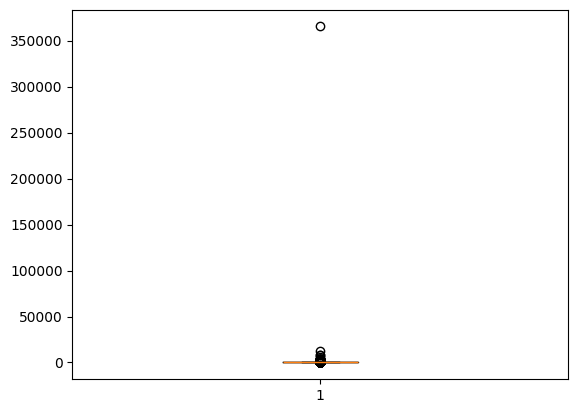

In [18]:
#欠損値の補正
from sklearn.covariance import MinCovDet
num_df = train_val.drop(str_col_name)
num_df = num_df.drop('id')
num_df2 = num_df.drop_nulls()
mcd2 = MinCovDet(random_state=0, support_fraction=0.7)
mcd2.fit(num_df2)
dis = mcd2.mahalanobis(num_df2)
dis = pl.Series(dis)
plt.boxplot(dis)
no = (dis>300000).arg_true().item()
#先頭から2561番目が外れ値となる事が分かったので除外
no_id = train_val[no]['id'].item()
train_val2 = train_val.filter(pl.col('id')!=no_id)

In [19]:
#欠損行を削除
not_nan_df = train_val2.drop_nulls() # df2は外れ値が無いデータ
temp_t = not_nan_df[['duration']]
temp_x = not_nan_df.drop(str_col_name)

#durationとyに関係があるという仮定が成り立つならば、適切な推定をするためには,
temp_x = temp_x.drop(['y','duration','id'])
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Lasso,Ridge

a, b, c, d = train_test_split(temp_x,temp_t,random_state=0,test_size=0.2)
maxvalue = 0
v = 0
# 今回はLasso回帰を利用するので、特徴量選択はしない
for i in range(1, 42):
    val = i/20
    model_liner = Lasso(random_state=0, alpha=val)
    # 今回は予測させたいだけなので、標準化はしない
    model_liner.fit(a, c)
    if maxvalue < model_liner.score(b, d):
        v = val
        maxvalue = model_liner.score(b, d)
print(v, maxvalue)
model_liner = Lasso(random_state=0, alpha=v)
# 今回は予測させたいだけなので、標準化はしない
model_liner.fit(a, c)
# pd.Series(model_liner)

0.05 0.748339123707666


,alpha,0.05
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,0
,selection,'cyclic'


In [20]:
#実際に使うのは外れ値込みのデータ
train_val3 = train_val.clone()
is_null_ids = train_val3.filter(pl.col('duration').is_null())['id'].to_list()
temp_x = train_val3.drop(str_col_name)
temp_x = temp_x.filter(pl.col('id').is_in(is_null_ids))
temp_x = temp_x.drop(['y','duration','id'])
#non_x=train_val2.loc[is_null,['housing_yes','loan_yes','age','marital_single','job_student']]
pred_d = model_liner.predict(temp_x)
train_val3 = (train_val3
    .join(
        pl.DataFrame({'id': is_null_ids, 'duration_pred': pred_d}),
        on='id', how='left'
    )
    .with_columns(
        pl.col('duration').fill_null(pl.col('duration_pred'))
    )
    .drop('duration_pred')
)

In [21]:
#12章付録で紹介したアンダーサンプリングを行う
def under_sampling(train_val):
    y_0 = train_val.filter(pl.col('y')==0)
    y_1 = train_val.filter(pl.col('y')==1)
    num_1 = len(y_1)
    #Y=1と同じ件数だけサンプリング
    y_0_2 = y_0.sample(n=num_1, seed=0)
    train_val2 = pl.concat([y_1, y_0_2])
    return train_val2

- 学習をさせよう。ただし、13章で学習した知識を使いたい。これまでは正解率を考えてきたが、今回のケースだと適合率、再現率のどちらを見るべきだろうか？

- y=1の適合率が高い⇒無駄なアポイントメントを減らす事が出来る。
- y=1の再現率が高い⇒潜在顧客を見逃さない

- スッキリ銀行は、効率よくキャンペーンを回したいと考えているので、y=1適合率に着目する

In [22]:
#まず、さくっと学習できるようなlearn関数を定義する。ただし、正解率では無くて適合率をみる
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
def learn(x, t, i):
    x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=13)

    datas = [x_train, x_val, y_train, y_val]
    base = DecisionTreeClassifier(max_depth=i, random_state=0, class_weight="balanced")
    #model = AdaBoostClassifier(n_estimators=150,base_estimator=base,random_state=0)
    
    #　追加
    
    base.fit(x_train, y_train)
    train_pred = base.predict(x_train)
    test_pred = base.predict(x_val)
    result = classification_report(y_pred=test_pred, y_true=y_val, output_dict=True)
    return result, base, datas

t = train_val3['y']
x = train_val3.drop(str_col_name)
x = x.drop(['id','y','day'])
res, model, datas = learn(x, t, i=8)
report2df(res)

class,precision,recall,f1-score,support
str,f64,f64,f64,f64
"""0""",0.904267,0.745492,0.817239,3383.0
"""1""",0.588825,0.822,0.686144,1500.0
"""accuracy""",null,null,0.768994,null
"""macro avg""",0.746546,0.783746,0.751691,4883.0
"""weighted avg""",0.807367,0.768994,0.776968,4883.0


In [23]:
# 適合率が低い。
# 12章で学習したランダムフォレストとアダブーストだとどうなるか？
def learn2(x, t, i, de=5, forest=True):
    x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=13)

    datas = [x_train, x_val, y_train, y_val]
    model = None
    if forest:
        model = RandomForestClassifier(n_estimators=i, random_state=0, max_depth=de, class_weight="balanced")
    #datas=[x_train,x_val,y_train,y_val]
    else:
        base = DecisionTreeClassifier(max_depth=de, random_state=0, class_weight="balanced")
        model = AdaBoostClassifier(n_estimators=i, estimator=base, random_state=0)
    #model = AdaBoostClassifier(n_estimators=150,base_estimator=base,random_state=0)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_val)
    result = classification_report(y_pred=test_pred, y_true=y_val, output_dict=True)
    return result, model, datas
t = train_val3['y']
x = train_val3.drop(str_col_name)
x = x.drop(['id','y','day'])

In [24]:
#ランダムフォレストでの検証
print("=================random_forest=========================")
max_pre = 0
for i in [50, 100, 150, 200]:#esti
    for j in range(5, 11):#depth
        res,model,datas = learn2(x, t, i=i, de=j, forest=True)
        res2 = report2df(res)
        pre = res2[1, 1]
        if max_pre < pre:
            max_pre=pre
            print(max_pre,i,j)
        print(i, j, pre, "finish next_i")
#アダブーストでの検証
print("=================adaboost=========================")
max_pre = 0
for i in [50, 100, 150, 200]:#esti
    for j in range(5,11):#depth
        res, model, datas = learn2(x, t, i=i, de=j, forest=False)
        res2 = report2df(res)
        pre = res2[1, 1]
        if max_pre < pre:
            max_pre = pre
            print(max_pre,i,j)
        print(i, j, pre, "finish next_i")


=================random_forest=========================
0.5658093797276853 50 5
50 5 0.5658093797276853 finish next_i
0.5665680473372781 50 6
50 6 0.5665680473372781 finish next_i
50 7 0.5641272902603665 finish next_i
0.5714973519499278 50 8
50 8 0.5714973519499278 finish next_i
0.5779317169717961 50 9
50 9 0.5779317169717961 finish next_i
0.5921843687374749 50 10
50 10 0.5921843687374749 finish next_i
100 5 0.5666163901458019 finish next_i
100 6 0.5736040609137056 finish next_i
100 7 0.5713572854291418 finish next_i
100 8 0.5722003929273084 finish next_i
100 9 0.5819180819180819 finish next_i
100 10 0.5906579608237067 finish next_i
150 5 0.5658561296859169 finish next_i
150 6 0.5740458015267176 finish next_i
150 7 0.572568578553616 finish next_i
150 8 0.5769990128331688 finish next_i
150 9 0.5847923961980991 finish next_i
150 10 0.5919395465994962 finish next_i
200 5 0.5637818909454727 finish next_i
200 6 0.573521980798383 finish next_i
200 7 0.570929070929071 finish next_i
200 8 0.57

- 非常に時間がかかるので途中で終了。
- random_forestよりadaboostの方がvalデータの精度が良く、その中でもestimator=100,max_depth=8が最も高い

- estimatorの値を100と固定して、max_depthについての考察を深める。k-分割交差検証で最適なmax_depthを考察するｂ

In [25]:
def learn_k_valid(x,t,i,dep):
    base = DecisionTreeClassifier(max_depth=dep, random_state=0, class_weight="balanced")
    model = AdaBoostClassifier(n_estimators=150, estimator=base, random_state=0)
    kv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    result = cross_validate(model,x,t,cv=kv,scoring='precision',return_train_score=True)
    
    #base.fit(x_train,y_train)
    #train_pred = base.predict(x_train)
    #test_pred = base.predict(x_val)
    #result = classification_report(y_pred=test_pred,y_true=y_val,output_dict=True)
    return result


In [26]:
t = train_val3['y']
x = train_val3.drop(str_col_name)
x = x.drop(['id','y','day'])
for j in range(2, 10):
    res = learn_k_valid(x, t, i=100, dep=j)
    res2 = res["train_score"]
    print(j, sum(res2)/len(res2), end="  ") # 平均値    
    res3 = res["test_score"]
    
    print(j, sum(res3)/len(res3)) # 平均値
    print(" j end next")

2 0.6143948574986754  2 0.612097197620951
 j end next
3 0.6061239223001528  3 0.6073266826610237
 j end next
4 0.6575679950963058  4 0.6467760558126552
 j end next
5 0.6533354508480276  5 0.6355883447581961
 j end next
6 0.674540992531386  6 0.6509961332250072
 j end next
7 0.720145728525495  7 0.6727155549675943
 j end next
8 0.7533043263754186  8 0.679669924392157
 j end next
9 0.8032245581717392  9 0.6592337190463408
 j end next


- 検証データの適合率が最も良いのは深さ9だが、明らかに過学習している。
- アンダーサンプリングで不均衡データの影響が変わるか確認してみる

In [27]:
train_val4 = under_sampling(train_val3)
t = train_val4['y']
x = train_val4.drop(str_col_name)
x = x.drop(['id', 'y', 'day'])
for j in range(2,10):
    res = learn_k_valid(x, t, i=100, dep=j)
    res2=res["train_score"]
    print(j, sum(res2)/len(res2),end="  ") # 平均値    
    res3=res["test_score"]
    
    print(j, sum(res3)/len(res3)) # 平均値
    print(" j end next")

2 0.8071649319307544  2 0.7996261331935753
 j end next
3 0.8046127510144997  3 0.7953860365080039
 j end next
4 0.8191948260676575  4 0.8005470990515677
 j end next
5 0.8333373133103098  5 0.7917903805095686
 j end next
6 0.8606638809073708  6 0.7941465358123101
 j end next
7 0.9499928085731391  7 0.7916554350095896
 j end next
8 0.9996164908916586  8 0.7861096655430465
 j end next
9 1.0  9 0.7840614864453492
 j end next


- 深さ2~３当たりが最もよさそうである。
- テストデータで検証するために再学習

In [28]:
train_val4 = under_sampling(train_val3)
t = train_val4['y']
x = train_val4.drop(str_col_name)
x = x.drop(['id', 'y', 'day'])
base_model = RandomForestClassifier(max_depth=3, random_state=0, class_weight="balanced")
model = AdaBoostClassifier(random_state=0, n_estimators=100, estimator=base_model)
model.fit(x, t)

,estimator,RandomForestC...andom_state=0)
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,0
,n_estimators,100
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [29]:
#テストデータ
test2 = test.clone()
is_null_ids = test2.filter(pl.col('duration').is_null())['id'].to_list()
print(len(is_null_ids))
if is_null_ids:
    temp_x = test2.drop(str_col_name)
    temp_x = temp_x.filter(pl.col('id').is_in(is_null_ids))
    temp_x = temp_x.drop(['y', 'duration', 'id'])
    pred_d = model_liner.predict(temp_x)
    test2 = (test2
        .join(
            pl.DataFrame({'id': is_null_ids, 'duration_pred': pred_d}),
            on='id', how='left'
        )
        .with_columns(
            pl.col('duration').fill_null(pl.col('duration_pred'))
        )
        .drop('duration_pred')
    )
x_test = test2.drop(str_col_name)
x_test = x_test.drop(['id', 'y', 'day'])
y_test = test['y']

713


In [30]:
pre = model.predict(x_test)
result = classification_report(y_pred=pre, y_true=y_test, output_dict=True)
report2df(result)

class,precision,recall,f1-score,support
str,f64,f64,f64,f64
"""0""",0.890909,0.770607,0.826403,1844.0
"""1""",0.621646,0.79977,0.699547,869.0
"""accuracy""",null,null,0.779948,null
"""macro avg""",0.756277,0.785189,0.762975,2713.0
"""weighted avg""",0.804661,0.779948,0.78577,2713.0


- y=1の適合率は0.64

In [31]:
y_p = model.predict_proba(x)
y_p

array([[0.48810384, 0.51189616],
       [0.52436152, 0.47563848],
       [0.54234895, 0.45765105],
       ...,
       [0.56695588, 0.43304412],
       [0.64668039, 0.35331961],
       [0.56963615, 0.43036385]], shape=(15628, 2))

In [32]:

#本書で紹介していないnumpyのテクニックを使っているが同様の事はpandasでもできる
#参考　予測確率の閾値を変更する事により予測結果を変えて調整する
#確率でいったん予測させる
y_p = model.predict_proba(x)
y_p
a = y_p[:, 1] # y=1の確率を抜き出す
def conf(a, th=0.5):
    import numpy as np
    y_pre = np.where(a<th, 0, 1) # 閾値以下なら0,以上なら1
    from sklearn.metrics import confusion_matrix
    # 混同行列をscikit-learnの関数で作成
    mat = confusion_matrix(y_pred=y_pre, y_true=t)
    pre = mat[1,1]/(mat[1,1]+mat[0,1])
    re = mat[1,1]/(mat[1,1]+mat[1,0])
    f1 = 2*(pre*re)/(pre+re)
    return pre, f1, mat # 適合率、ｆ１スコア、混同行列
conf(a, 0.5) # 閾値0.5

(np.float64(0.8389787664307381),
 np.float64(0.8442070456568741),
 array([[6540, 1274],
        [1176, 6638]]))

- presitionを上げるためには閾値をもう少しあげればよい
- ただし、閾値を上げすぎると適合率が低下してしまうのでf1スコアも意識する

In [33]:
for i in range(1,30):
    val = 0.50+(i/1000)
    print(i)
    b = conf(a, val)#閾値0.5
    print(val, b[0], b[1])

1
0.501 0.8420315682281059 0.8442884492661137
2
0.502 0.8441425275570367 0.8434938524590165
3
0.503 0.8465512787393439 0.8426330676266393
4
0.504 0.8494132985658409 0.8415138207181607
5
0.505 0.8513265038087733 0.8402903811252269
6
0.506 0.8535907948684036 0.8395447154471545
7
0.507 0.8561534363345764 0.8390549536614018
8
0.508 0.8580827067669173 0.8375049141659023
9
0.509 0.8603926878808396 0.8361076386604382
10
0.51 0.8620453923981406 0.833553675304072
11
0.511 0.8646077485178547 0.8324152120528308
12
0.512 0.8677145639170956 0.8315670199293473
13
0.513 0.8723763910409917 0.8305505263863743
14
0.514 0.8752663730643557 0.8295967144684576
15
0.515 0.8783182666092696 0.8281133734695258
16
0.516 0.8808455190386565 0.8265742816384757
17
0.517 0.8827737226277372 0.8247408619749046
18
0.518 0.8849779086892489 0.822925225965489
19
0.519 0.8877156454491374 0.8211583436511212
20
0.52 0.8892561983471075 0.8180247425530445
21
0.521 0.8917400546614029 0.8156944444444445
22
0.522 0.894849785407725

- 閾値を0.503にすると全体的に最もよさそう。

In [34]:

th = 0.503
#テストデータ
proba = model.predict_proba(x_test)

In [35]:
a = proba[:,1]
pre = np.where(a<th, 0, 1)
result = classification_report(y_pred=pre, y_true=y_test, output_dict=True)
report2df(result)

class,precision,recall,f1-score,support
str,f64,f64,f64,f64
"""0""",0.883608,0.786334,0.832138,1844.0
"""1""",0.632463,0.780207,0.698609,869.0
"""accuracy""",null,null,0.784372,null
"""macro avg""",0.758035,0.783271,0.765373,2713.0
"""weighted avg""",0.803163,0.784372,0.789367,2713.0
